In [1]:
 !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *

     |████████████████████████████████| 720 kB 5.7 MB/s 
     |████████████████████████████████| 1.2 MB 36.6 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 189 kB 45.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 51 kB 308 kB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
Path.BASE_PATH = path

In [4]:
(path/'images').ls()

(#7393) [Path('images/japanese_chin_126.jpg'),Path('images/British_Shorthair_258.jpg'),Path('images/pomeranian_199.jpg'),Path('images/boxer_33.jpg'),Path('images/basset_hound_5.jpg'),Path('images/yorkshire_terrier_85.jpg'),Path('images/boxer_22.jpg'),Path('images/yorkshire_terrier_172.jpg'),Path('images/Russian_Blue_80.jpg'),Path('images/Abyssinian_126.jpg')...]

In [5]:
fname = (path/'images').ls()[0]

In [6]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['japanese_chin']

In [7]:
fname.name

'japanese_chin_126.jpg'

In [8]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75)
)

dls = pets.dataloaders(path/'images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


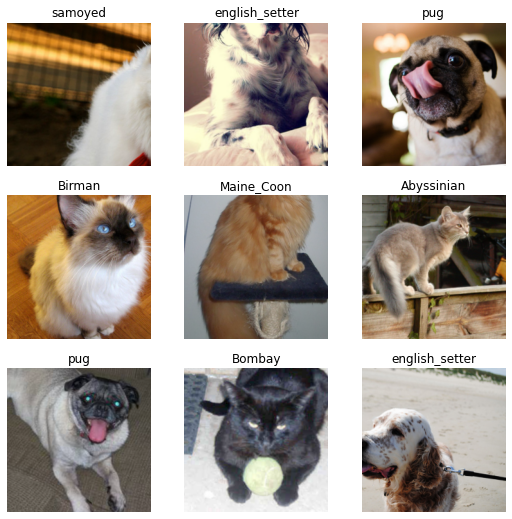

In [9]:
dls.show_batch(nrows=3, ncols=3)

In [10]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/english_setter_74.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x334
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/english_setter_74.jpg
    applying partial gives
      english_setter
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(19)

Final sample: (PILImage mode=RGB size=500x334, TensorCategory(19))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting u

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.508952,0.339612,0.104195,02:03


epoch,train_loss,valid_loss,error_rate,time
0,0.504886,0.297009,0.094723,02:40
1,0.316618,0.225165,0.066982,02:40


In [12]:
x,y = dls.one_batch()

In [13]:
y

TensorCategory([34, 13, 11, 28, 31, 25,  0, 22, 21, 36, 20, 25, 15, 11,  0, 31, 29,  0, 34, 26, 18, 31,  5, 33, 15, 19,  8, 30,  4, 20, 21, 25, 14, 36, 21, 21, 32, 31, 36, 17, 19, 24, 21, 24, 28,  8,  9, 11,
        23, 33, 36, 31, 36,  5, 24, 13,  2, 16, 21, 17, 19, 31,  9, 11], device='cuda:0')

In [14]:
preds,_ = learn.get_preds(dl=[(x,y)])

In [15]:
preds.shape

torch.Size([64, 37])

it should be 64x37

In [16]:
preds[0]

TensorBase([2.6813e-05, 4.4644e-05, 1.7350e-04, 1.6483e-04, 2.2951e-03, 2.0483e-04, 6.7197e-05, 4.1985e-04, 3.8521e-04, 2.2064e-03, 6.3171e-05, 3.8347e-05, 2.4417e-02, 2.0970e-02, 4.2652e-04, 1.3897e-05,
        9.9423e-04, 5.0702e-04, 5.9463e-05, 3.3428e-04, 8.1904e-04, 4.4121e-04, 2.9918e-05, 4.3038e-05, 7.4041e-04, 4.8573e-05, 8.0813e-05, 8.4255e-05, 1.3225e-05, 1.6215e-04, 3.5723e-04, 1.3889e-03,
        2.5655e-04, 1.4468e-03, 9.3996e-01, 2.4779e-04, 6.8716e-05])

In [17]:
torch.random.manual_seed(42);

In [18]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [19]:
preds[0]

TensorBase([2.6813e-05, 4.4644e-05, 1.7350e-04, 1.6483e-04, 2.2951e-03, 2.0483e-04, 6.7197e-05, 4.1985e-04, 3.8521e-04, 2.2064e-03, 6.3171e-05, 3.8347e-05, 2.4417e-02, 2.0970e-02, 4.2652e-04, 1.3897e-05,
        9.9423e-04, 5.0702e-04, 5.9463e-05, 3.3428e-04, 8.1904e-04, 4.4121e-04, 2.9918e-05, 4.3038e-05, 7.4041e-04, 4.8573e-05, 8.0813e-05, 8.4255e-05, 1.3225e-05, 1.6215e-04, 3.5723e-04, 1.3889e-03,
        2.5655e-04, 1.4468e-03, 9.3996e-01, 2.4779e-04, 6.8716e-05])

In [20]:
acts[:,1]

tensor([ 0.2576,  0.4607, -0.3727, -1.2760,  0.5347,  1.6187])

In [21]:
at = torch.randn((6,6))*2
at

tensor([[ 0.7117, -1.3732, -0.9867,  0.4830, -2.2218,  0.1831],
        [-4.6338, -0.4336, -0.6195, -0.7914,  1.6068, -1.2432],
        [-1.1840, -0.1261, -1.6571,  0.6618,  0.0698,  0.6422],
        [ 3.1472, -1.6909,  0.7345,  0.3508,  2.7703, -0.8917],
        [ 2.8903,  1.7128,  4.4362,  1.0463,  2.3507,  1.1223],
        [-0.9055, -1.5436, -0.3444,  1.0476,  0.1132,  0.8526]])

In [22]:
at[: , 0]

tensor([ 0.7117, -4.6338, -1.1840,  3.1472,  2.8903, -0.9055])

In [23]:
sm_at = torch.softmax(at, dim=1)
sm_at

tensor([[0.3642, 0.0453, 0.0666, 0.2898, 0.0194, 0.2147],
        [0.0014, 0.0936, 0.0777, 0.0654, 0.7202, 0.0417],
        [0.0487, 0.1402, 0.0303, 0.3082, 0.1705, 0.3022],
        [0.5370, 0.0043, 0.0481, 0.0328, 0.3684, 0.0095],
        [0.1447, 0.0446, 0.6788, 0.0229, 0.0843, 0.0247],
        [0.0529, 0.0279, 0.0927, 0.3730, 0.1465, 0.3069]])

torch.sum(sm_at)

In [24]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [25]:
targ = tensor([0,1,0,1,1,0])